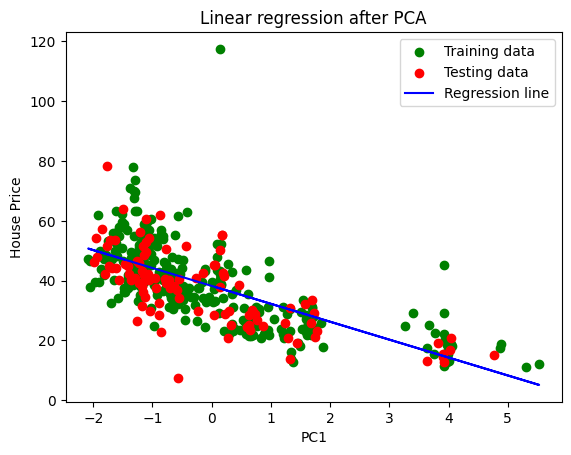

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# Load the dataset
house = pd.read_csv('/content/house_price.csv')

# Extract features and target variable
x = house.iloc[:, 1:7].values
y = house.iloc[:, 7].values

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Apply PCA
pca = PCA(n_components=1)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Fit a linear regression model after PCA
regressor = LinearRegression()
regressor.fit(x_train_pca, y_train)

# Plot the results
plt.scatter(x_train_pca, y_train, color='green', label='Training data')
plt.scatter(x_test_pca, y_test, color='red', label='Testing data')
plt.plot(x_train_pca, regressor.predict(x_train_pca), color='blue', label='Regression line')
plt.title('Linear regression after PCA')
plt.xlabel('PC1')
plt.ylabel('House Price')
plt.legend()
plt.show()
